In [1]:
import pandas as pd

In [3]:
df_training_secure = pd.read_json('./train_datasets/train_secure.jsonl', lines=True)
df_training_insecure = pd.read_json('./train_datasets/train_insecure.jsonl', lines=True)
df_validation_secure = pd.read_json('./validation_datasets/validation_secure.jsonl', lines=True)
df_validation_insecure = pd.read_json('./validation_datasets/validation_insecure.jsonl', lines=True)
df_test_secure = pd.read_json('./test_datasets/test_secure.jsonl', lines=True)
df_test_insecure = pd.read_json('./test_datasets/test_insecure.jsonl', lines=True)

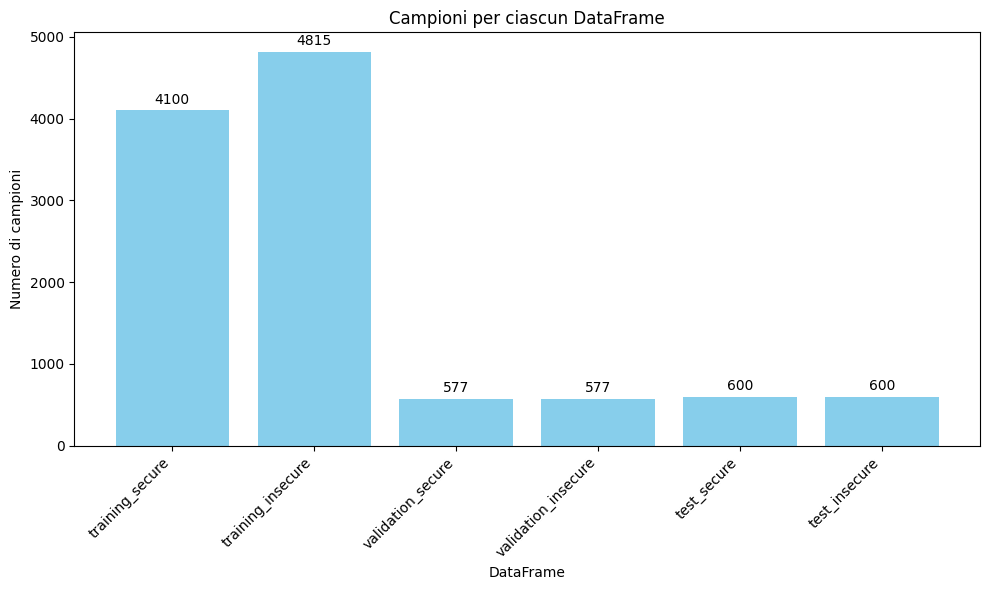

In [4]:
import matplotlib.pyplot as plt

# Lista dei tuoi DataFrame
dataframes = [
    df_training_secure,
    df_training_insecure,
    df_validation_secure,
    df_validation_insecure,
    df_test_secure,
    df_test_insecure
]

# Etichette corrispondenti
labels = [
    'training_secure',
    'training_insecure',
    'validation_secure',
    'validation_insecure',
    'test_secure',
    'test_insecure'
]

# Calcolo numero di righe (campioni) per DataFrame
counts = [df.shape[0] for df in dataframes]

# Creazione dell’istogramma (grafico a barre)
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, counts, color='skyblue')

# Aggiunta dei valori sopra ogni barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + max(counts)*0.01, f'{yval}', ha='center', va='bottom')

# Etichette e titolo
plt.xlabel('DataFrame')
plt.ylabel('Numero di campioni')
plt.title('Campioni per ciascun DataFrame')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [7]:
import os
import json

def load_jsonl_count(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        return sum(1 for _ in f)

def compute_split_stats(base_dir):
    splits = ["train", "validation", "test"]
    types = ["secure", "insecure"]

    # Carica le dimensioni
    stats = {t: {s: 0 for s in splits} for t in types}

    for split in splits:
        for typ in types:
            path = os.path.join(base_dir, f"{split}_datasets", f"{split}_{typ}.jsonl")
            if os.path.exists(path):
                stats[typ][split] = load_jsonl_count(path)
            else:
                print(f"⚠️ File not found: {path}")
    
    return stats

def print_summary_table(stats):
    print("\n📊 Distribuzione per tipo rispetto al totale (Secure/Insecure):\n")

    for typ in ["secure", "insecure"]:
        print(f"🔹 {typ.capitalize()} samples:")

        total = sum(stats[typ].values())
        header = f"{'Split':<12} {'Count':>8} {'% of total':>12}"
        print(header)
        print("-" * len(header))

        for split in ["train", "validation", "test"]:
            count = stats[typ][split]
            percent = f"{(count / total * 100):.1f}%" if total > 0 else "0.0%"
            print(f"{split:<12} {count:>8} {percent:>12}")

        print(f"{'TOTAL':<12} {total:>8} {'100.0%':>12}\n")

if __name__ == "__main__":
    base_dir = "."  # Modifica se necessario
    stats = compute_split_stats(base_dir)
    print_summary_table(stats)



📊 Distribuzione per tipo rispetto al totale (Secure/Insecure):

🔹 Secure samples:
Split           Count   % of total
----------------------------------
train            4100        77.7%
validation        577        10.9%
test              600        11.4%
TOTAL            5277       100.0%

🔹 Insecure samples:
Split           Count   % of total
----------------------------------
train            4815        80.4%
validation        577         9.6%
test              600        10.0%
TOTAL            5992       100.0%

